In [2]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np
from cifParsing import *
from MMfunc import *
from importlib import reload
import sys 

reload(sys.modules['MMfunc'])
reload(sys.modules['cifParsing'])
None

In [5]:
def allEqPoints(CELL):
  """
  Find all points with zeros and add their equivalents to make whole cell 
  From [0,0,0] to [1,1,1] 
  """
  CELLwith0s = CELL[~CELL.all(axis=1)]
  for point in CELLwith0s:
    CELL = np.append(CELL,eqPoints(point),axis =0)
  return np.unique(CELL,axis=0)
  
mycell = allEqPoints(CELL-1)
print(len(np.unique(mycell,axis=0)))
# print(mycell)

144


In [9]:
filename = 'ZnS-Sfaleryt.cif'
# filename = '9008064.cif'
CELL,base = getSCell(Crystal.from_cif, filename, size = 3)
print(len(CELL))
# print(CELL)

280


In [9]:
def usunkoor(koorZEW, oski):
    koorWEW = koorZEW.copy()
    for os in oski:
        j = 1
        while j < len(koorWEW):            
            for punktdous in listadous(os, koorWEW[j]):                
                i = findindex(punktdous, koorWEW.T[:,j:])                
                if i + 1 and porownajPunkty(koorWEW[i+j],punktdous):
                    koorWEW = np.delete(koorWEW, i+j, 0)
            j += 1
    return koorWEW

Matrixes = generateSymetryBase()

oski1 = [Matrixes["m"][os] for os in Matrixes["m"]][3:] 
oski2 =  [Matrixes["-4"][os] for os in Matrixes["-4"]] + [Matrixes["3"][os] for os in Matrixes["3"]][1:]
oski = oski1 + oski2
SUPERCELL = supercell(CELL, size = 8)
lol = usunkoor(SUPERCELL, oski)

In [10]:
for el in lol:
    print(el)

[-1. -1. -1.]
[-1.   -1.   -0.75]
[-1.  -1.  -0.5]
[-1.   -1.   -0.25]
[-1. -1.  0.]
[-1.   -1.    0.25]
[-1.  -1.   0.5]
[-1.   -1.    0.75]
[-1. -1.  1.]
[-1.    -0.875 -0.875]
[-1.    -0.875 -0.625]
[-1.    -0.875 -0.375]
[-1.    -0.875 -0.125]
[-1.    -0.875  0.125]
[-1.    -0.875  0.375]
[-1.    -0.875  0.625]
[-1.    -0.875  0.875]
[-1.   -0.75 -0.75]
[-1.   -0.75 -0.5 ]
[-1.   -0.75 -0.25]
[-1.   -0.75  0.  ]
[-1.   -0.75  0.25]
[-1.   -0.75  0.5 ]
[-1.   -0.75  0.75]
[-1.    -0.625 -0.625]
[-1.    -0.625 -0.375]
[-1.    -0.625 -0.125]
[-1.    -0.625  0.125]
[-1.    -0.625  0.375]
[-1.    -0.625  0.625]
[-1.  -0.5 -0.5]
[-1.   -0.5  -0.25]
[-1.  -0.5  0. ]
[-1.   -0.5   0.25]
[-1.  -0.5  0.5]
[-1.    -0.375 -0.375]
[-1.    -0.375 -0.125]
[-1.    -0.375  0.125]
[-1.    -0.375  0.375]
[-1.   -0.25 -0.25]
[-1.   -0.25  0.  ]
[-1.   -0.25  0.25]
[-1.    -0.125 -0.125]
[-1.    -0.125  0.125]
[-1.  0.  0.]
[-1.  1.  1.]
[-0.9375 -0.9375 -0.9375]
[-0.9375 -0.9375 -0.6875]
[-0.9375 -0.9

In [8]:
TESTCELL = np.unique([
       [-1. , -1. , -1. ],
       [-1. ,  0. ,  0. ],
       [-1. ,  1. , -1. ],
       [-1. , -1. ,  1. ],
       [-1. ,  1. ,  1. ],
       [-0.5, -0.5, -0.5],
       [-0.5,  0.5,  0.5],
       [ 0. , -1. ,  0. ],
       [ 1. , -1. , -1. ],
       [ 0. ,  0. , -1. ],
       [ 0. ,  1. ,  0. ],
       [ 0.5, -0.5,  0.5],
       [ 0.5,  0.5, -0.5],
       [ 1. ,  0. ,  0. ],
       [ 1. , -1. ,  1. ],
       [ 0. ,  1. , 0. ],
       [ 1. ,  1. , -1. ],
       [ 1. ,  1. ,  1. ],
       [ 0, 0, 1]
],axis=0)
print(len(TESTCELL))

18


In [80]:
def getSCell(fromwhere, filename, size): 
    """
    Get cell from cod/cif/else. 
    Expand it to supercell size.
    Place points between -1 and less than 1
    Add missing walls of a cell.
    """
    file = fromwhere(filename)
    basetype = millerORweber(file.symmetry()['international_number'])
    points = file.supercell(size,size,size).itersorted() 
    mylist = np.array([point.coords_fractional for point in points])
    mylist = np.around(allEqPoints(mylist/(size/2)-1),6)
    if size%2:
      mylist = np.vstack((mylist, np.array([1,1,1])))
    return np.unique(mylist,axis=0), basetype
  
def test_poprawnosc_wypluwanych_koordynatow(SC,TC): # zmienic na 
  assert len(SC) == len(TC), f"amounts of points doesnt match: len1 = {len(SC)}, len2 =  {len(TC)}"
  
  from MMfunc import porownajMacierze
  assert porownajMacierze(SC,TC), "contents of cells dont match"
  
  print("Ok")

TESTCELL2 = np.unique([[1., -1., -1.],[1., -1., 0.],[1., -1., 1.],[1., -0.5, -0.5],[1., -0.5, 0.5],[1., 0., -1.],[1., 0., 0.],[1., 0., 1.],[1., 0.5, -0.5],[1., 0.5, 0.5],[1., 1., -1.],[1., 1., 0.],[1., 1., 1.],[0.75, -0.75, -0.75],[0.75, -0.75, 0.25],[0.75, -0.25, -0.25],[0.75, 0.25, -0.75],[0.75, 0.25, 0.25],[0.75, 0.75, -0.25],[0.75, 0.75, 0.75],[0.5, -1., -0.5],[0.5, -1., 0.5],[0.5, -0.5, -1.],[0.5, -0.5, 0.],[0.5, -0.5, 1.],[0.5, 0., -0.5],[0.5, 0., 0.5],[0.5, 0.5, -1.],[0.5, 0.5, 0.],[0.5, 0.5, 1.],[0.5, 1., -0.5],[0.5, 1., 0.5],[0.25, -0.75, -0.25],[0.25, -0.75, 0.75],[0.25, -0.25, -0.75],[0.25, -0.25, 0.25],[0.25, 0.25, -0.25],[0.25, 0.25, 0.75],[0.25, 0.75, -0.75],[0.25, 0.75, 0.25],[0., -1., -1.],[0., -1., 0.],[0., -1., 1.],[0., -0.5, -0.5],[0., -0.5, 0.5],[0., 0., -1.],[0., 0., 0.],[0., 0., 1.],[0., 0.5, -0.5],[0., 0.5, 0.5],[0., 1., -1.],[0., 1., 0.],[0., 1., 1.],[-0.25, -0.75, -0.75],[-0.25, -0.75, 0.25],[-0.25, -0.25, -0.25],[-0.25, -0.25, 0.75],[-0.25, 0.25, -0.75],[-0.25, 0.25, 0.25],[-0.25, 0.75, -0.25],[-0.25, 0.75, 0.75],[-0.25, 0.75, 0.75],[-0.5, -1., -0.5],[-0.5, -1., 0.5],[-0.5, -0.5, -1.],[-0.5, -0.5, 0.],[-0.5, -0.5, 1.],[-0.5, 0., -0.5],[-0.5, 0., 0.5],[-0.5, 0.5, -1.],[-0.5, 0.5, 0.],[-0.5, 0.5, 1.],[-0.5, 1., -0.5],[-0.5, 1., 0.5],[-0.75, -0.75, -0.25],[-0.75, -0.75, 0.75],[-0.75, -0.25, -0.75],[-0.75, -0.25, 0.25],[-0.75, 0.25, -0.25],[-0.75, 0.25, 0.75],[-0.75, 0.75, -0.75],[-0.75, 0.75, 0.25],[-1., -1., -1.],[-1., -1., 0.],[-1., -1., 1.],[-1., -0.5, -0.5],[-1., -0.5, 0.5],[-1., 0., -1.],[-1., 0., 0.],[-1., 0., 1.],[-1., 0.5, -0.5],[-1., 0.5, 0.5],[-1., 1., -1.],[-1., 1., 0.],[-1., 1., 1.]]
,axis=0)  
  
SC2, BS = getSCell(FROM.CIF,'ZnS-Sfaleryt.cif',2)

for nr, points in enumerate(zip(SC2,TESTCELL2)):
  
  if not porownajPunkty(*points):
    print(nr)
    print(*points)
# test_poprawnosc_wypluwanych_koordynatow(SC2,TESTCELL2)
# len(SC2)
# print(SC2)

13
[-0.75 -0.75 -0.75] [-0.75 -0.75 -0.25]
14
[-0.75 -0.75  0.25] [-0.75 -0.75  0.75]
15
[-0.75 -0.25 -0.25] [-0.75 -0.25 -0.75]
16
[-0.75 -0.25  0.75] [-0.75 -0.25  0.25]
17
[-0.75  0.25 -0.75] [-0.75  0.25 -0.25]
18
[-0.75  0.25  0.25] [-0.75  0.25  0.75]
19
[-0.75  0.75 -0.25] [-0.75  0.75 -0.75]
20
[-0.75  0.75  0.75] [-0.75  0.75  0.25]
33
[-0.25 -0.75 -0.25] [-0.25 -0.75 -0.75]
34
[-0.25 -0.75  0.75] [-0.25 -0.75  0.25]
35
[-0.25 -0.25 -0.75] [-0.25 -0.25 -0.25]
36
[-0.25 -0.25  0.25] [-0.25 -0.25  0.75]
37
[-0.25  0.25 -0.25] [-0.25  0.25 -0.75]
38
[-0.25  0.25  0.75] [-0.25  0.25  0.25]
39
[-0.25  0.75 -0.75] [-0.25  0.75 -0.25]
40
[-0.25  0.75  0.25] [-0.25  0.75  0.75]
54
[ 0.25 -0.75 -0.75] [ 0.25 -0.75 -0.25]
55
[ 0.25 -0.75  0.25] [ 0.25 -0.75  0.75]
56
[ 0.25 -0.25 -0.25] [ 0.25 -0.25 -0.75]
57
[ 0.25 -0.25  0.75] [ 0.25 -0.25  0.25]
58
[ 0.25  0.25 -0.75] [ 0.25  0.25 -0.25]
59
[0.25 0.25 0.25] [0.25 0.25 0.75]
60
[ 0.25  0.75 -0.25] [ 0.25  0.75 -0.75]
61
[0.25 0.75 0.7

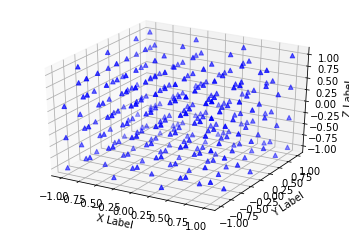

In [11]:
# SUPERCELL = supercell(CELL, size = 1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for c, m in [('r', 'o'), ('b', '^')]:
POMCELL = CELL
# var = np.unique(np.argwhere((POMCELL==0.25)|(POMCELL==0.75))[:,0])
# l1 = POMCELL[var]
# xs, ys, zs = l1.T
# ax.scatter(xs, ys, zs, c="r", marker="^")

mojalista2 = POMCELL
# mojalista2  = np.delete(mojalista2, var, 0)
xs, ys, zs = mojalista2.T
ax.scatter(xs, ys, zs, c="b", marker="^")

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()